# Infer network

Infer a network and plot with gene labels.

## More details
Plot networks inferred from datasets simulated from realistic network structures. Several datasets are available, from different organisms, different numbers of genes in the networks and different numbers of cells in the dataset. To infer a network from a different dataset, make sure the data file is in the same format as the simulated datasets, and change `dataset_name` to the relevant path.

For very large datasets (tens of thousands of cells, thousands of genes), network inference may take a long time. Benchmarking scripts are included to indicate how number of cells, number of genes and algorithm affect the time taken to infer a network.

The network inference algorithms rank all edges, between every possible pair of genes. In order to progress from a ranked list to a network, a threshold must be set, indicating what percentage of the highest-ranked edges to include.

In [1]:
# Include packages

using NetworkInference
using Junet

include("../helper_functions.jl")


Use "abstract type DirParam end" instead.

Use "abstract type Directed<:DirParam end" instead.

Use "abstract type Undirected<:DirParam end" instead.

Use "abstract type MultiParam end" instead.

Use "Node{N,E}(...) where {N,E}" instead.

Use "Node{N,E}(...) where {N,E}" instead.

Use "abstract type AbstractNodePtrView{T,_,D<:DirParam}<:AbstractVector{T} end" instead.

Use "abstract type AbstractNodePtrRangeView{T,_,D}<:AbstractNodePtrView{T,_,D} end" instead.



















Use "abstract type AbstractAttribute{T}<:AbstractVector{T} end" instead.



Use "LightGraph{N,E<:Void,D,M} = Graph{N,E,D,M}" instead.

Use "DirectedGraph{N,E,D<:Directed,M} = Graph{N,E,D,M}" instead.

Use "DirectedFwGraph{N,E,D<:Forward,M} = Graph{N,E,D,M}" instead.

Use "DirectedRvGraph{N,E,D<:Reverse,M} = Graph{N,E,D,M}" instead.

Use "UndirectedGraph{N,E,D<:Undirected,M} = Graph{N,E,D,M}" instead.

Use "MultiGraph{N,E,D,M<:Multi} = Graph{N,E,D,M}" instead.

Use "SimpleGraph{N,E,D,M<:Simple} = Graph{N,E,D,M}

get_times_per_number_of_cells (generic function with 1 method)

In [2]:
# Customize the dataset, algorithm and percentage threshold (for plotting)

# 50 or 100
number_of_genes = 50
# "ecoli1", "ecoli2", "yeast1", "yeast2" or "yeast3"
organism = "yeast1"
# "large", "medium", or "small"
size = "large"

# Or change to custom path
dataset_name = string("../simulated_datasets/", number_of_genes, "_", organism, "_", size, ".txt")

# PIDCNetworkInference() or MINetworkInference()
algorithm = PIDCNetworkInference()

# 0.0 < threshold < 1.0
threshold = 0.15

0.15

In [3]:
# Get the genes and discretize the expression levels

@time genes = get_genes(dataset_name);

 10.447358 seconds (6.06 M allocations: 9.363 GiB, 10.65% gc time)


In [4]:
# Infer the network

@time network = NetworkAnalysis(algorithm, genes);

  2.854437 seconds (2.32 M allocations: 129.720 MiB, 2.33% gc time)


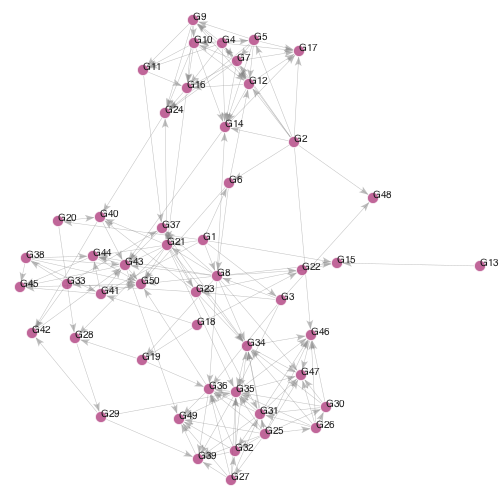

In [5]:
# Plot the network at the given threshold

plot(network_analysis_to_graph(network, threshold))